In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',None)
flight_=pd.read_excel("flight scrapping.xlsx") 
flight_.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Since data is in form of excel file we have to use pandas read_excel to load the data

### Data Preprocessing

In [3]:
flight_.shape

(10683, 11)

we have 10683 rows and 11 columns

In [4]:
flight_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
flight_.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

we have 1 null value in route and total stops columns

In [6]:
# important lib.s for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

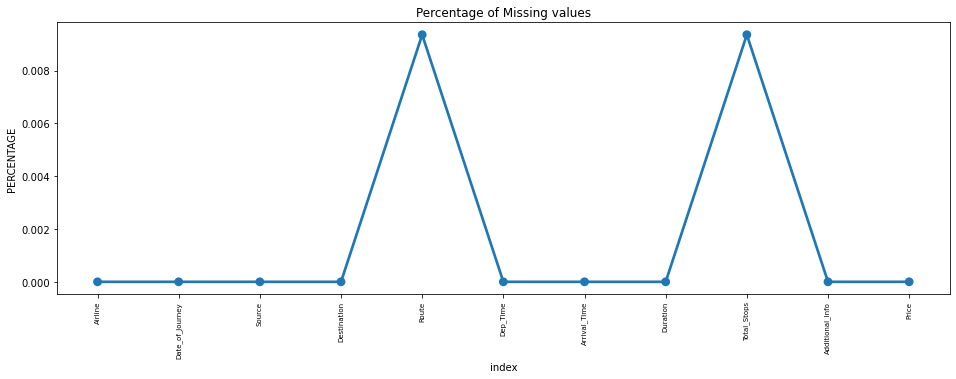

In [7]:
# visualization of  null values
missing = pd.DataFrame((flight_.isnull().sum())*100/flight_.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [8]:
flight_.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

number of unique values

In [9]:
flight_.dropna(axis=0,inplace=True)
flight_.reset_index(drop=True)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


dropping null values

In [10]:
flight_.shape

(10682, 11)

after dropping null values now we have 10682 rows and 11 columns

In [11]:
flight_["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

we have 5 sources from where fligh take off

In [12]:
flight_["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

here delhi and new delhi two classes are given

In [13]:
# Feature Engg
flight_['Destination']= flight_['Destination'].replace({'New Delhi':'Delhi'})

In [14]:
flight_["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

now data look good after merging new delhi into delhi

In [15]:
flight_["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [16]:
flight_["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

### Feature Engg

In [17]:
flight_[["Journey_day", "Journey_month", "Journey_year"]] = flight_["Date_of_Journey"].str.split("/", expand = True)
flight_=flight_.drop('Date_of_Journey',axis=1)
flight_.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [18]:
flight_['Journey_year'].value_counts()

2019    10682
Name: Journey_year, dtype: int64

we have only one year, so we drop it

In [19]:
flight_.drop('Journey_year',axis=1,inplace=True)

In [20]:
# extracting dep hour 
flight_["Dep_Hour_Time"]=pd.to_datetime(flight_.Dep_Time).dt.hour
#extracting dep min
flight_["Dep_Min_time"]=pd.to_datetime(flight_.Dep_Time).dt.minute
flight_=flight_.drop('Dep_Time',axis=1) # dropping dep time
flight_.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour_Time,Dep_Min_time
0,IndiGo,Banglore,Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,05,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,06,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,05,18,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,01,03,16,50


In [21]:
# extracting arr hour
flight_["Arr_Hour_Time"]=pd.to_datetime(flight_.Arrival_Time).dt.hour
# extracting arr min
flight_["Arr_Min_time"]=pd.to_datetime(flight_.Arrival_Time).dt.minute
flight_=flight_.drop('Arrival_Time',axis=1) # dropping arrival time
flight_.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour_Time,Dep_Min_time,Arr_Hour_Time,Arr_Min_time
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,05,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,06,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,05,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,01,03,16,50,21,35


In [22]:
# separating hours and min from duration

duration=list(flight_["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i]="0h "+duration[i]           # Adds 0 hour

duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [23]:
flight_["Duration_hours"]=duration_hours
flight_["Duration_mins"]=duration_mins


flight_.drop(["Duration"],axis=1,inplace=True)

hours and mins extracted from duration

In [24]:
flight_.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour_Time,Dep_Min_time,Arr_Hour_Time,Arr_Min_time,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,03,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,05,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,06,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,05,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,01,03,16,50,21,35,4,45


In [25]:
flight_["Route"].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BLR → HBX → BOM → NAG → DEL       1
BLR → HBX → BOM → AMD → DEL       1
BOM → JDH → JAI → DEL → HYD       1
BOM → GOI → HYD                   1
BOM → NDC → HYD                   1
Name: Route, Length: 128, dtype: int64

In [26]:
flight_["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

additional info contains information data

In [27]:
flight_["Additional_Info"]=flight_["Additional_Info"].replace({'No Info':'No info'})

In [28]:
flight_["Additional_Info"].value_counts()

No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

### EDA

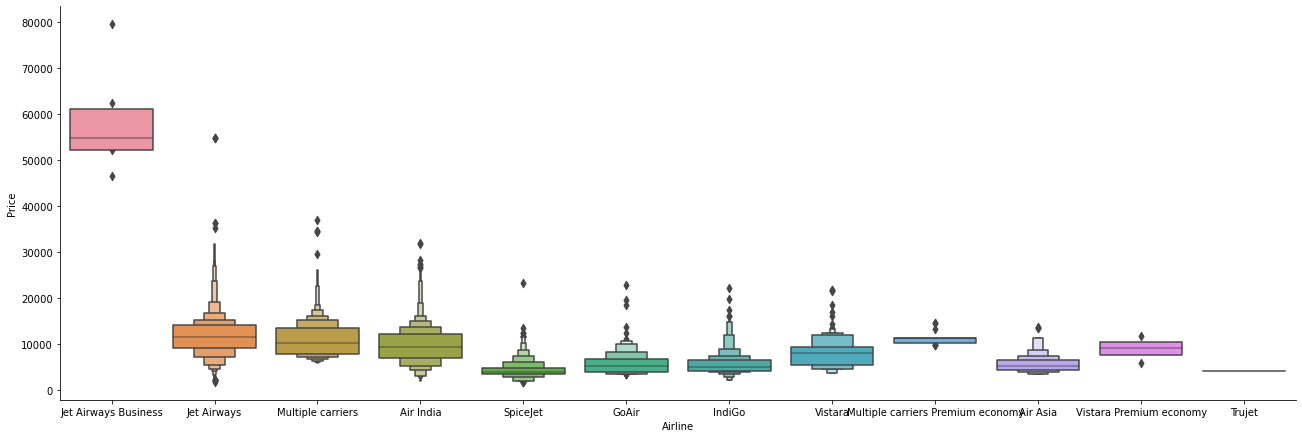

In [29]:
# airline vs price
sns.catplot(y="Price",x="Airline",data=flight_.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

1) From graph we can see that Jet Airways Business have the highest Price.

2) Apart from the first Airline almost all are having similar median

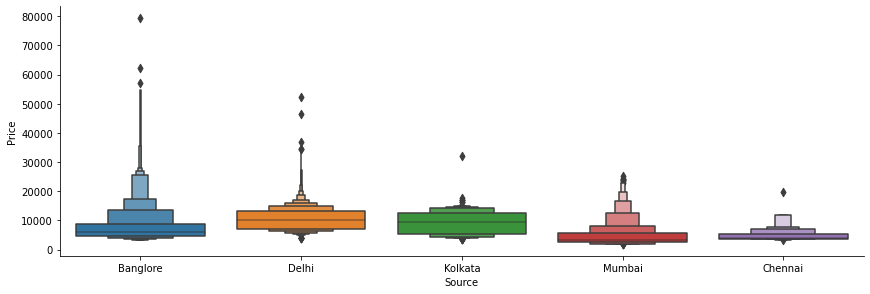

In [30]:
# Source vs Price
sns.catplot(y ="Price",x="Source",data=flight_.sort_values("Price",ascending=False),kind="boxen",height=4,aspect=3)
plt.show()

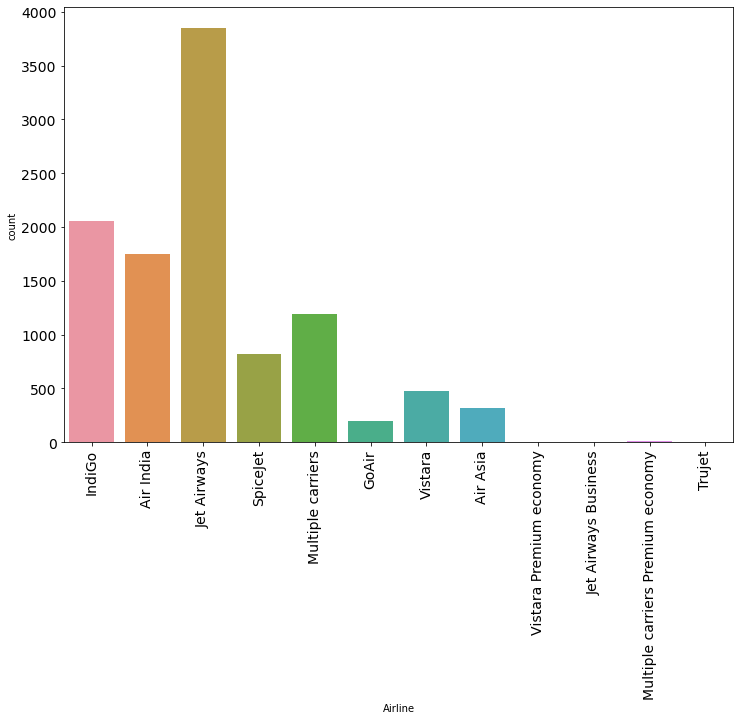

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(flight_['Airline'])
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Mostly people use to travel with Jet Airways followed by indigo and airindia

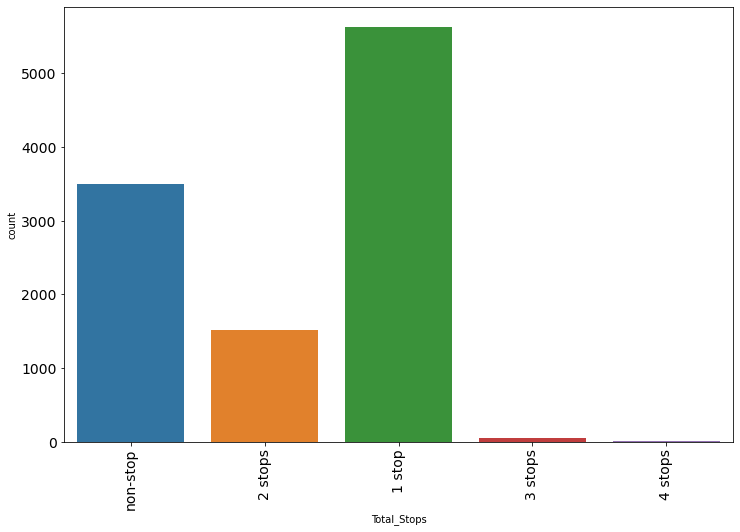

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(flight_['Total_Stops'])
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Mostly people take a fligh who has only one stop

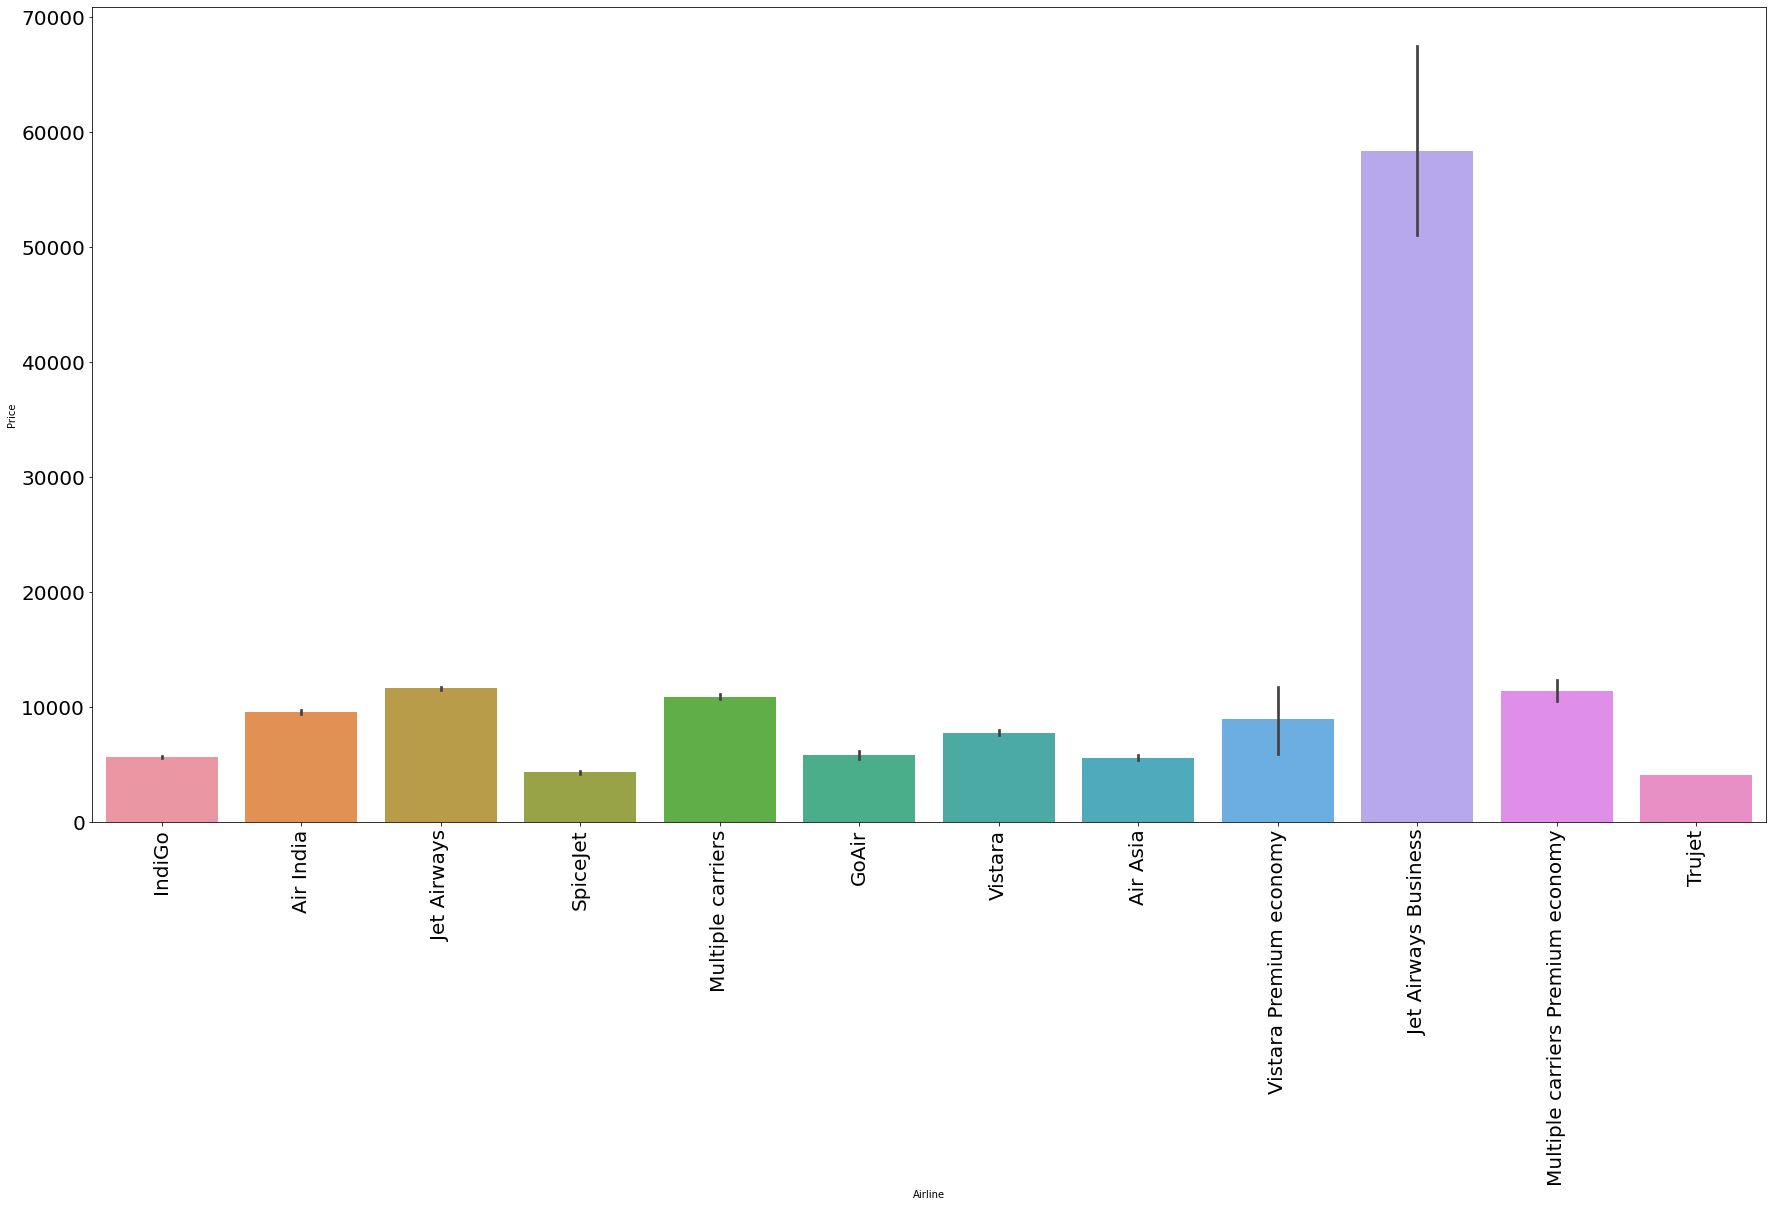

In [33]:
plt.figure(figsize=(30,15))
sns.barplot(x='Airline',y='Price',data=flight_)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.show()

highest price is in jet airways business class

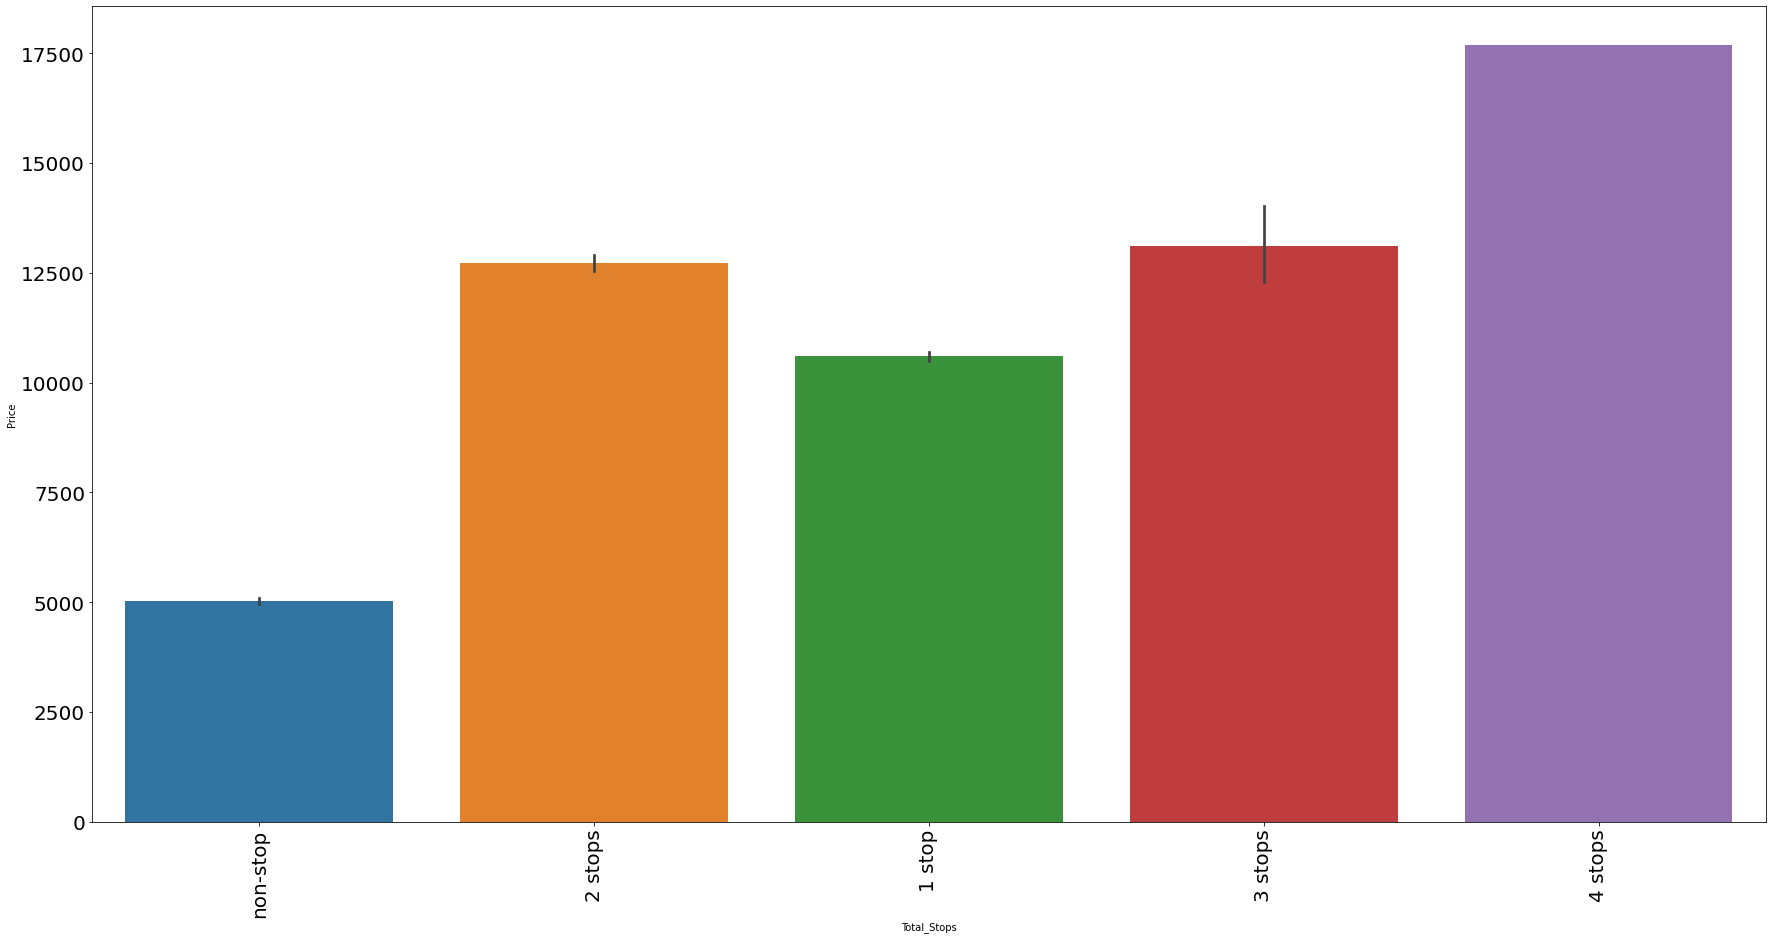

In [34]:
plt.figure(figsize=(30,15))
sns.barplot(x='Total_Stops',y='Price',data=flight_)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.show()

price ranges as stops increases

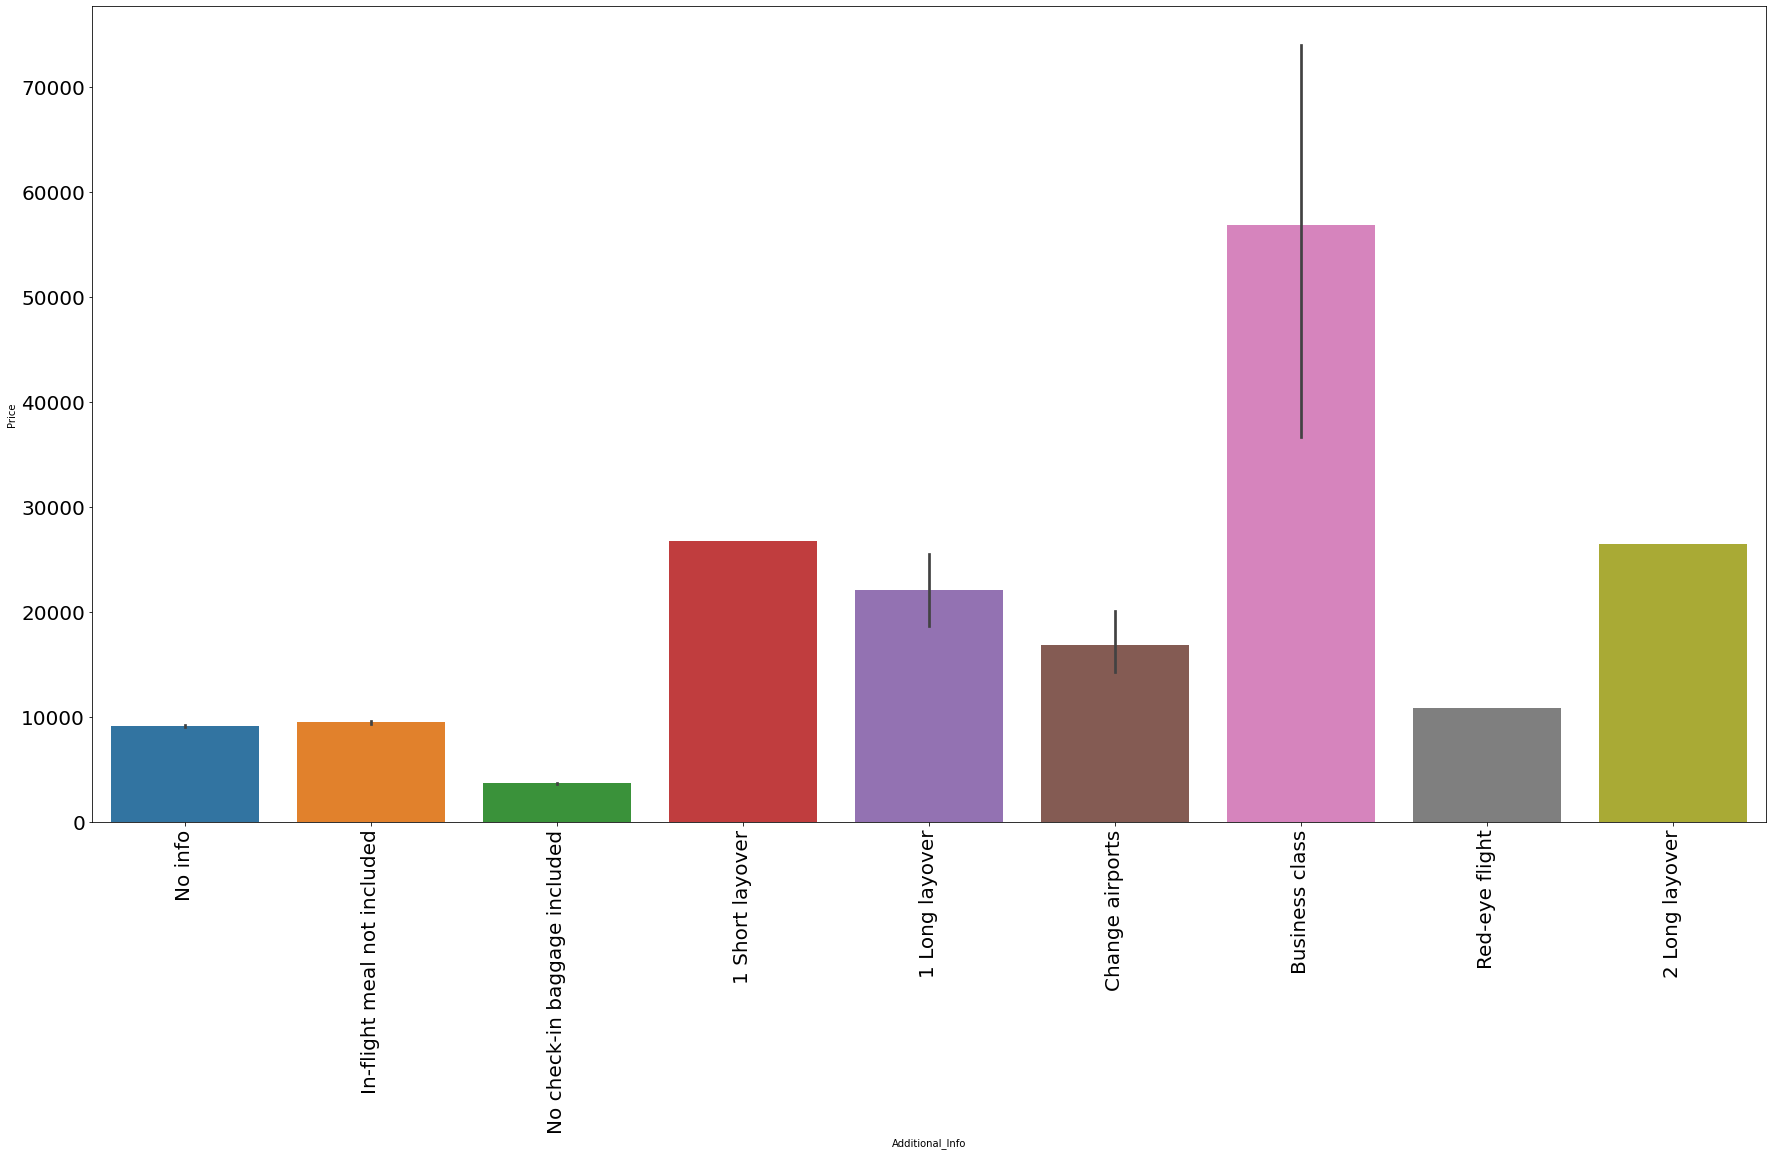

In [35]:
plt.figure(figsize=(30,15))
sns.barplot(x='Additional_Info',y='Price',data=flight_)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.show()

business class has highest price ticket

In [36]:
flight_.drop(['Journey_day','Journey_month',"Route"],axis=1,inplace=True)

dropping unnecessary columns

In [37]:
flight_.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Dep_Hour_Time,Dep_Min_time,Arr_Hour_Time,Arr_Min_time,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,non-stop,No info,3897,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1 stop,No info,13302,16,50,21,35,4,45


# label encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

flight_['Total_Stops']=le.fit_transform(flight_['Total_Stops'])
flight_['Destination']=le.fit_transform(flight_['Destination'])
flight_['Source']=le.fit_transform(flight_['Source'])
flight_['Airline']=le.fit_transform(flight_['Airline'])
flight_['Additional_Info']=le.fit_transform(flight_['Additional_Info'])

Here Values are assigned with label encoder

In [39]:
flight_.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Dep_Hour_Time,Dep_Min_time,Arr_Hour_Time,Arr_Min_time,Duration_hours,Duration_mins
0,3,0,2,4,7,3897,22,20,1,10,2,50
1,1,3,0,1,7,7662,5,50,13,15,7,25
2,4,2,1,1,7,13882,9,25,4,25,19,0
3,3,3,0,0,7,6218,18,5,23,30,5,25
4,3,0,2,0,7,13302,16,50,21,35,4,45


### heatmap for correlation

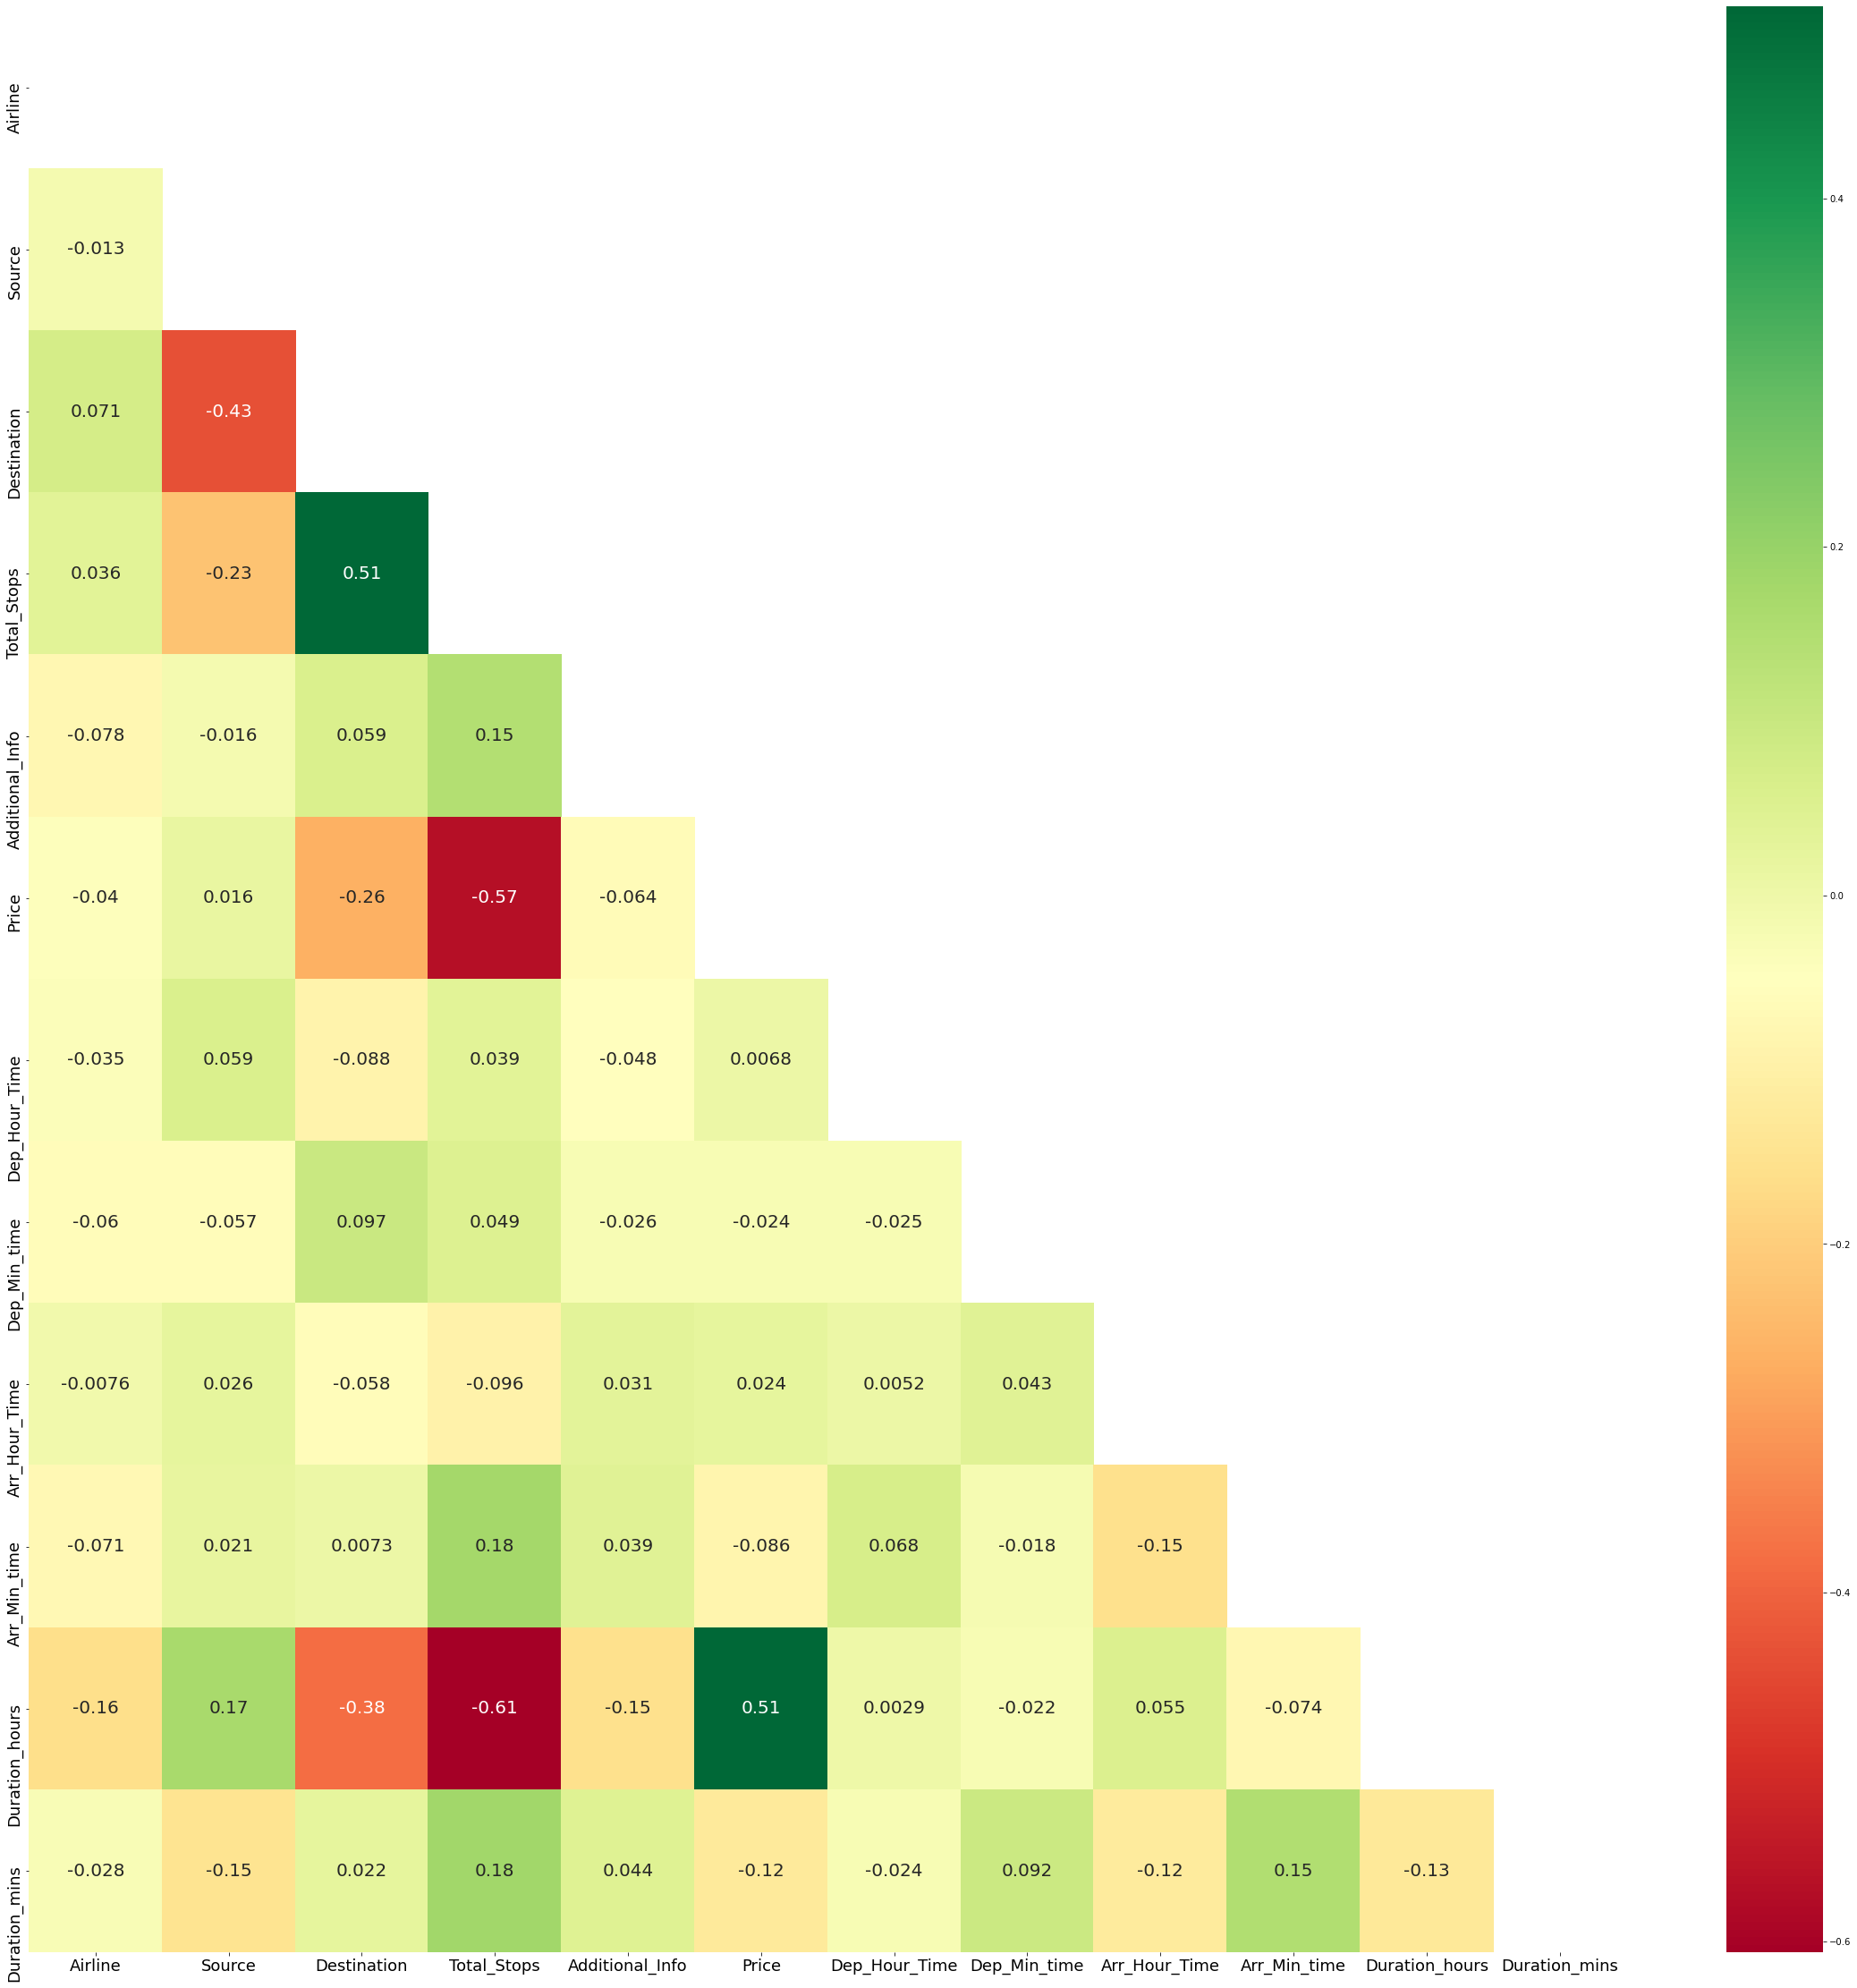

In [40]:
plt.figure(figsize=(40,40))
mask = np.triu(np.ones_like(flight_.corr()))
res = sns.heatmap(flight_.corr(), cmap='RdYlGn', annot=True,annot_kws={"size":20}, mask=mask)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)


plt.show()

### checking outliers

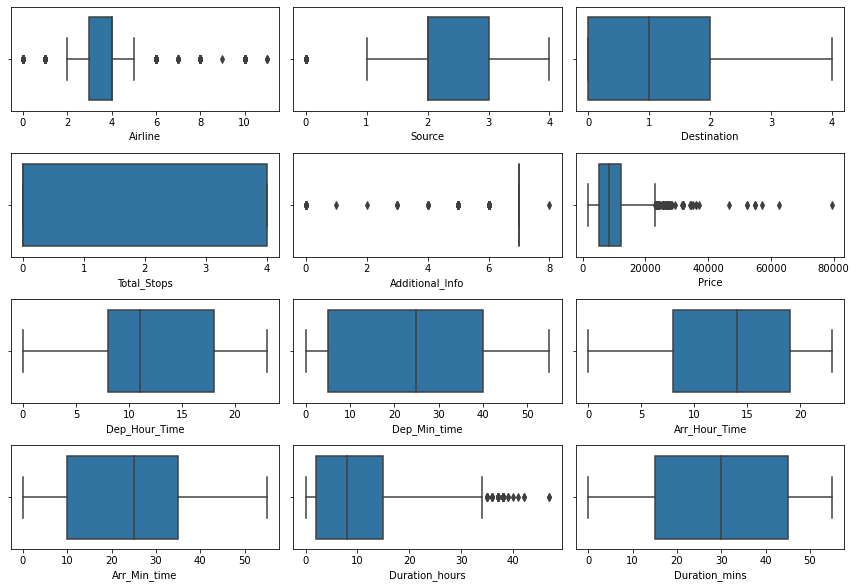

In [41]:
X_val=flight_.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
    plt.subplot(10,3,i+1)
    sns.boxplot(flight_[X_val[i]])
    plt.tight_layout()

no outliers are present because there is categorical columns only

### checking skewness

In [42]:
flight_.skew()

Airline            0.731057
Source            -0.424023
Destination        0.846631
Total_Stops        0.631532
Additional_Info   -2.114397
Price              1.812405
Dep_Hour_Time      0.112924
Dep_Min_time       0.167234
Arr_Hour_Time     -0.370146
Arr_Min_time       0.110945
Duration_hours     0.851197
Duration_mins     -0.090680
dtype: float64

no skewness is present 

### splitting x and y

In [43]:
x=flight_.drop('Price',axis=1)
y=flight_['Price']

### standard scaling

In [44]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=scaler.fit_transform(x)

### Model Building

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### finding best random state

In [46]:
from sklearn.model_selection import train_test_split
# finding best random state
max_r2_score=0
max_rs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    error=mean_squared_error(y_test,pred)
    if r2>max_r2_score:
        max_r2_score=r2
        max_rs=i
print('\nmax_rs:',max_rs)


max_rs: 64


In [47]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=max_rs)

In [48]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
print(f"r2 score:{r2*100:.2f}")
print(f'error:{error}')

r2 score:43.68
error:10454141.766903797


In [49]:
# DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
print(f"r2 score:{r2*100:.2f}")
print(f'error:{error}')

r2 score:68.05
error:5930533.049138546


In [50]:
# KNeighborsRegressor
knnr=KNeighborsRegressor()
knnr.fit(x_train,y_train)
pred=knnr.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
print(f"r2 score:{r2*100:.2f}")
print(f'error:{error}')

r2 score:73.37
error:4943988.537535101


In [51]:
# RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
print(f"r2 score:{r2*100:.2f}")
print(f'error:{error}')

r2 score:73.30
error:4956259.185680598


In [52]:
# GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
print(f"r2 score:{r2*100:.2f}")
print(f'error:{error}')

r2 score:71.19
error:5348013.9999488965


### Regularization to remove overfitting

In [53]:
 from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [54]:
lassocv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lassocv.fit(x_train,y_train)

alpha=lassocv.alpha_
alpha

lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
pred=lasso_reg.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
print(f"r2 score:{r2*100:.2f}")
print(f'error:{error}')

r2 score:43.68
error:10454123.267030768


In [55]:
ridcv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridcv.fit(x_train,y_train)

alpha=ridcv.alpha_
alpha

rid_reg=Ridge(alpha)
rid_reg.fit(x_train,y_train)
pred=rid_reg.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
print(f"r2 score:{r2*100:.2f}")
print(f'error:{error}')

r2 score:43.68
error:10454141.66256982


### cross validation to check overfitted model

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
m=[lr,dtr,knnr,rfr,gbr,lasso_reg,rid_reg]
for i in m:
    scr=cross_val_score(i,x,y,cv=10)
    print('\n\n----------',i,'------------')
    print(f'score:{scr.mean()*100:.2f}') 



---------- LinearRegression() ------------
score:39.04


---------- DecisionTreeRegressor() ------------
score:67.28


---------- KNeighborsRegressor() ------------
score:70.56


---------- RandomForestRegressor() ------------
score:72.58


---------- GradientBoostingRegressor() ------------
score:70.54


---------- Lasso(alpha=0.03054433509243787) ------------
score:39.04


---------- Ridge(alpha=0.001) ------------
score:39.04


### HyperParameter Tuning

######  on the basis of best least difference best model is  Decission Tree Regressor

In [58]:
from sklearn.model_selection import GridSearchCV

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7],
           "min_samples_leaf":[1,2,3,7,10],
           "min_weight_fraction_leaf":[0.1,0.4,0.7,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40] }
clf=GridSearchCV(dtr,parameters)
clf.fit(x_train,y_train)
print('best parameters',clf.best_params_)

dtr_new=clf.best_estimator_
scr_=cross_val_score(dtr_new,x,y,cv=10)
dtr_new.fit(x_train,y_train)
pred=dtr_new.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f"r2 score:{r2*100:.2f}")
print(f'error:{error}')

best parameters {'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
cross validation score:55.76%

r2 score:59.99
error:7427368.281029866


### saving best model

In [59]:
import pickle
filename='flight_price_final.pkl'
pickle.dump(dtr_new,open(filename,'wb'))

# 